In [1]:
# Import Libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [3]:
# Load Datasets

In [4]:
deliveries = pd.read_csv("Project Datasets/deliveries.csv")
matches = pd.read_csv("Project Datasets/matches.csv")

In [5]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [6]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [7]:
deliveries.shape   # deliveries dataset have 260920 rows and 17 columns

(260920, 17)

In [8]:
matches.shape      # matches dataset have 1095 rows and 20 columns

(1095, 20)

In [9]:
deliveries.dtypes   # check dataset datatypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batter              object
bowler              object
non_striker         object
batsman_runs         int64
extra_runs           int64
total_runs           int64
extras_type         object
is_wicket            int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

In [10]:
matches.dtypes

id                   int64
season              object
city                object
date                object
match_type          object
player_of_match     object
venue               object
team1               object
team2               object
toss_winner         object
toss_decision       object
winner              object
result              object
result_margin      float64
target_runs        float64
target_overs       float64
super_over          object
method              object
umpire1             object
umpire2             object
dtype: object

In [11]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [12]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [13]:
deliveries.duplicated().sum() # Check duplicates in the dataset, if duplicates found drop them.

0

In [14]:
matches.duplicated().sum()

0

In [15]:
deliveries.isna().sum()  # Check null values in the dataset

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [16]:
matches.isna().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

## --Data Cleaning--

In [17]:
matches["team1"].value_counts()   # checking the team columns

team1
Royal Challengers Bangalore    135
Chennai Super Kings            128
Mumbai Indians                 123
Kolkata Knight Riders          121
Rajasthan Royals               101
Kings XI Punjab                 92
Sunrisers Hyderabad             86
Delhi Daredevils                85
Delhi Capitals                  41
Deccan Chargers                 39
Punjab Kings                    31
Lucknow Super Giants            23
Pune Warriors                   23
Gujarat Titans                  21
Gujarat Lions                   16
Royal Challengers Bengaluru      9
Rising Pune Supergiant           7
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Name: count, dtype: int64

In [18]:
matches["team2"].value_counts()

team2
Mumbai Indians                 138
Kolkata Knight Riders          130
Rajasthan Royals               120
Chennai Super Kings            110
Royal Challengers Bangalore    105
Kings XI Punjab                 98
Sunrisers Hyderabad             96
Delhi Daredevils                76
Delhi Capitals                  50
Deccan Chargers                 36
Punjab Kings                    25
Gujarat Titans                  24
Pune Warriors                   23
Lucknow Super Giants            21
Gujarat Lions                   14
Rising Pune Supergiant           9
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Royal Challengers Bengaluru      6
Name: count, dtype: int64

In [19]:
deliveries["batting_team"].value_counts()

batting_team
Mumbai Indians                 31437
Kolkata Knight Riders          29514
Chennai Super Kings            28651
Royal Challengers Bangalore    28205
Rajasthan Royals               26242
Kings XI Punjab                22646
Sunrisers Hyderabad            21843
Delhi Daredevils               18786
Delhi Capitals                 10946
Deccan Chargers                 9034
Punjab Kings                    6833
Gujarat Titans                  5494
Pune Warriors                   5443
Lucknow Super Giants            5400
Gujarat Lions                   3566
Rising Pune Supergiant          1900
Royal Challengers Bengaluru     1818
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: count, dtype: int64

In [20]:
deliveries["bowling_team"].value_counts()

bowling_team
Mumbai Indians                 31505
Kolkata Knight Riders          29663
Chennai Super Kings            28576
Royal Challengers Bangalore    28358
Rajasthan Royals               26432
Kings XI Punjab                22483
Sunrisers Hyderabad            21717
Delhi Daredevils               18725
Delhi Capitals                 11216
Deccan Chargers                 9039
Punjab Kings                    6719
Pune Warriors                   5457
Gujarat Titans                  5301
Lucknow Super Giants            5226
Gujarat Lions                   3545
Rising Pune Supergiant          1928
Royal Challengers Bengaluru     1801
Rising Pune Supergiants         1615
Kochi Tuskers Kerala            1614
Name: count, dtype: int64

#### From the team column analysis, I found that the teams Rising Pune Supergiants and Royal Challengers Bangalore are repeated twice, and we need to fix this

In [21]:
matches.replace({
    'Rising Pune Supergiants': 'Rising Pune Supergiant',
    'Royal Challengers Bangalore ': 'Royal Challengers Bangalore'}, inplace=True)

deliveries.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore'}, inplace=True)

In [22]:
matches["team1"].value_counts()  

team1
Royal Challengers Bangalore    135
Chennai Super Kings            128
Mumbai Indians                 123
Kolkata Knight Riders          121
Rajasthan Royals               101
Kings XI Punjab                 92
Sunrisers Hyderabad             86
Delhi Daredevils                85
Delhi Capitals                  41
Deccan Chargers                 39
Punjab Kings                    31
Lucknow Super Giants            23
Pune Warriors                   23
Gujarat Titans                  21
Gujarat Lions                   16
Rising Pune Supergiant          14
Royal Challengers Bengaluru      9
Kochi Tuskers Kerala             7
Name: count, dtype: int64

In [23]:
deliveries["batting_team"].value_counts()  # Columns was fixed 

batting_team
Mumbai Indians                 31437
Royal Challengers Bangalore    30023
Kolkata Knight Riders          29514
Chennai Super Kings            28651
Rajasthan Royals               26242
Kings XI Punjab                22646
Sunrisers Hyderabad            21843
Delhi Daredevils               18786
Delhi Capitals                 10946
Deccan Chargers                 9034
Punjab Kings                    6833
Gujarat Titans                  5494
Pune Warriors                   5443
Lucknow Super Giants            5400
Gujarat Lions                   3566
Rising Pune Supergiant          3480
Kochi Tuskers Kerala            1582
Name: count, dtype: int64

In [24]:
# fixing null values in matches dataset

In [25]:
matches["city"].isna().sum()  # In matches dataset, the column city having 51 null values

51

In [26]:
matches["method"].isna().sum()  # column method having 51 null values

1074

In [30]:
matches["city"].fillna("Unknown", inplace=True)     # fills missing city names with "Unknown"

In [31]:
matches["method"].fillna("Non D/L", inplace=True)   # fills missing method values with "Non D/L"

In [32]:
matches["city"].isna().sum()   # Null values have been fixed

0

In [33]:
matches["method"].isna().sum()   # Null values have been fixed

0

## -- 1. Success Rate of Teams --

In [34]:
Total_wins = matches.groupby("winner").count()["id"]  # Wins per team
Total_wins

winner
Chennai Super Kings            138
Deccan Chargers                 29
Delhi Capitals                  48
Delhi Daredevils                67
Gujarat Lions                   13
Gujarat Titans                  28
Kings XI Punjab                 88
Kochi Tuskers Kerala             6
Kolkata Knight Riders          131
Lucknow Super Giants            24
Mumbai Indians                 144
Pune Warriors                   12
Punjab Kings                    24
Rajasthan Royals               112
Rising Pune Supergiant          15
Royal Challengers Bangalore    116
Royal Challengers Bengaluru      7
Sunrisers Hyderabad             88
Name: id, dtype: int64

In [35]:
Total_matches_palyed = matches.groupby("team1").count()["id"]+matches.groupby("team2").count()["id"]  
Total_matches_palyed                                                                                   # Total matches played per team

team1
Chennai Super Kings            238
Deccan Chargers                 75
Delhi Capitals                  91
Delhi Daredevils               161
Gujarat Lions                   30
Gujarat Titans                  45
Kings XI Punjab                190
Kochi Tuskers Kerala            14
Kolkata Knight Riders          251
Lucknow Super Giants            44
Mumbai Indians                 261
Pune Warriors                   46
Punjab Kings                    56
Rajasthan Royals               221
Rising Pune Supergiant          30
Royal Challengers Bangalore    240
Royal Challengers Bengaluru     15
Sunrisers Hyderabad            182
Name: id, dtype: int64

In [36]:
Success_Rate  = round((Total_wins/Total_matches_palyed)*100,2).reset_index()
Success_Rate.columns = ["Team", "Success Rate (%)"]
Success_Rate = Success_Rate.sort_values(by="Success Rate (%)",ascending=False).reset_index(drop=True)
Success_Rate                                                                                                # Success Rate of each Team

,Team,Success Rate (%)
0,Gujarat Titans,62.22
1,Chennai Super Kings,57.98
2,Mumbai Indians,55.17
3,Lucknow Super Giants,54.55
4,Delhi Capitals,52.75
5,Kolkata Knight Riders,52.19
6,Rajasthan Royals,50.68
7,Rising Pune Supergiant,50.00
8,Sunrisers Hyderabad,48.35
9,Royal Challengers Bangalore,48.33


In [37]:
# Visualization of the Success Rate of Teams

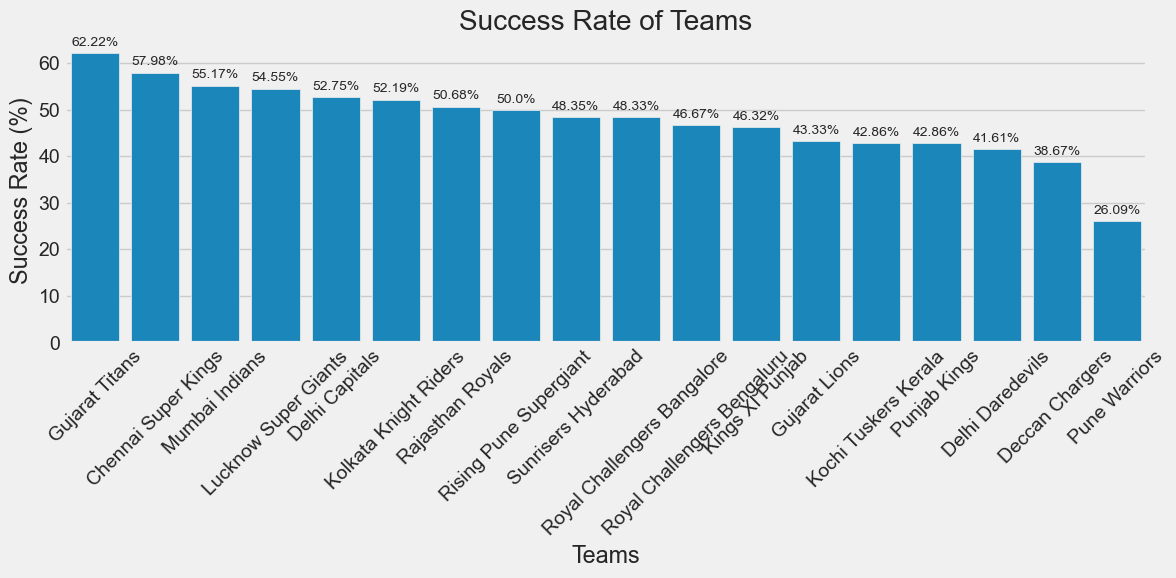

In [38]:
plt.figure(figsize=(12,6))
bars = sns.barplot(x=Success_Rate["Team"], y=Success_Rate["Success Rate (%)"])
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{height}%',  # text
                  xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 3),  # offset
                  textcoords="offset points",
                  ha='center', va='bottom', fontsize=10)

plt.title('Success Rate of Teams')
plt.xlabel('Teams')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## -- 2. Most Titles Wins --

In [39]:
winner_counts = matches.groupby("season")[['season','winner']].tail(1)["winner"].value_counts().reset_index()
winner_counts

,winner,count
0,Chennai Super Kings,5
1,Mumbai Indians,5
2,Kolkata Knight Riders,3
3,Rajasthan Royals,1
4,Deccan Chargers,1
5,Sunrisers Hyderabad,1
6,Gujarat Titans,1


In [40]:
# Visualization of the Most Titles Wins

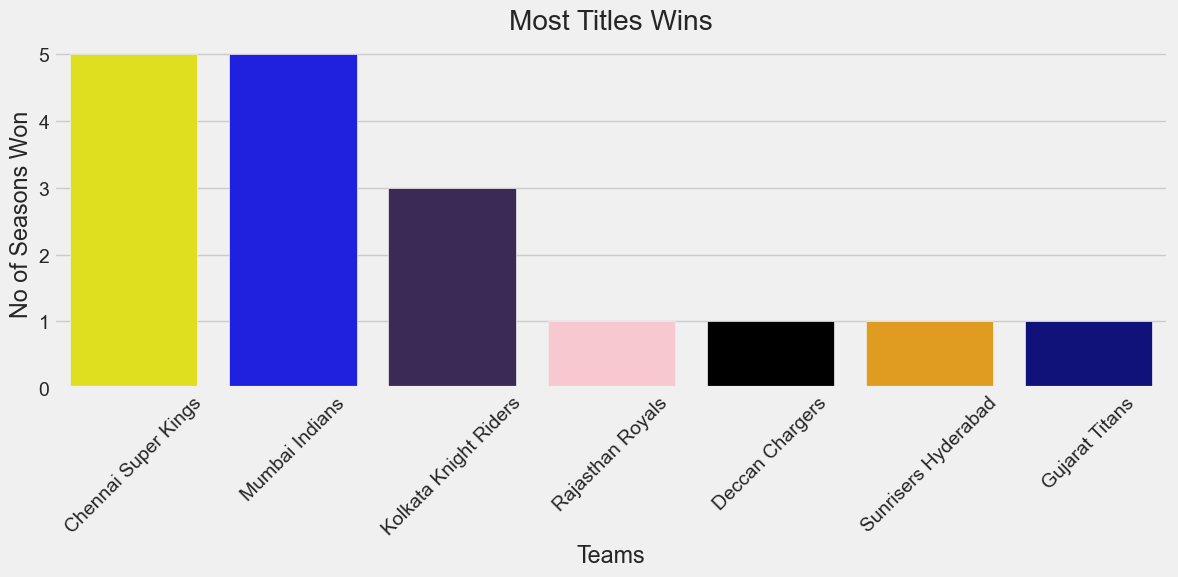

In [41]:
colors = ['yellow', 'blue', '#3A225D', 'pink', 'black', 'orange', 'darkblue']
plt.figure(figsize=(12,6))
sns.barplot(x="winner", y="count", data=winner_counts, hue="winner", palette=colors, dodge=False, legend=False)
plt.title('Most Titles Wins')
plt.xlabel('Teams')
plt.ylabel('No of Seasons Won')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## -- 3. Top 10 Players most runs --

In [42]:
Total_runs_by_batter = deliveries.groupby("batter")["batsman_runs"].sum().reset_index(name="Runs")
Top10_batters=Total_runs_by_batter.sort_values(by="Runs",ascending=False).head(10).reset_index(drop=True)
Top10_batters

,batter,Runs
0,V Kohli,8014
1,S Dhawan,6769
2,RG Sharma,6630
3,DA Warner,6567
4,SK Raina,5536
5,MS Dhoni,5243
6,AB de Villiers,5181
7,CH Gayle,4997
8,RV Uthappa,4954
9,KD Karthik,4843


In [43]:
# Visualization of the Top 10 Players most runs

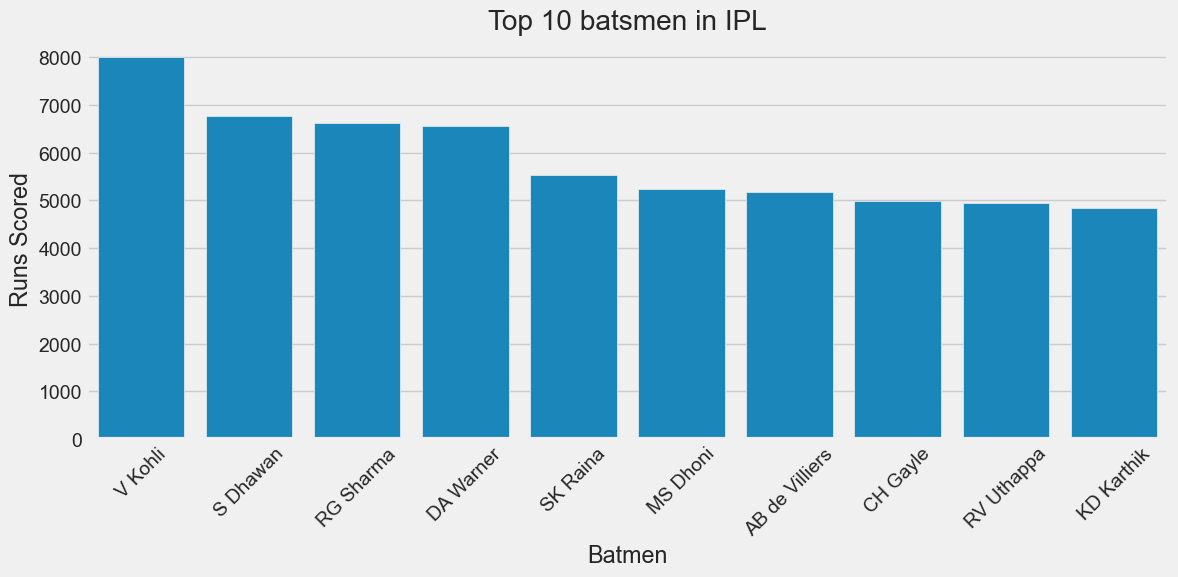

In [44]:
plt.figure(figsize=(12,6))
sns.barplot(x="batter", y="Runs", data=Top10_batters)
plt.title('Top 10 batsmen in IPL')
plt.xlabel('Batmen')
plt.ylabel('Runs Scored')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## -- 4. Top 10 Best Performances in a Match --

In [54]:
batting_runs_in_inngs = deliveries.groupby(["match_id","batter"])["batsman_runs"].sum().reset_index(name="Innings_Runs")
top_batsmen_scores = batting_runs_in_inngs.sort_values(by="Innings_Runs",ascending=False)[:10]
top_batsmen_scores                                             # Top 10 highest score batters in all seasons

,match_id,batter,Innings_Runs
5302,598027,CH Gayle,175
2,335982,BB McCullum,158
14108,1304112,Q de Kock,140
7528,829795,AB de Villiers,133
11583,1216510,KL Rahul,132
15383,1370352,Shubman Gill,129
8359,980987,AB de Villiers,129
4687,548372,CH Gayle,128
10149,1136602,RR Pant,128
2237,419137,M Vijay,127


In [55]:
batsman_balls_faces = deliveries.groupby(["match_id","batter"])["batsman_runs"].count().reset_index(name="Balls_faced")
batsman_balls_faces          # Balls faced by each batsman in an innings

,match_id,batter,Balls_faced
0,335982,AA Noffke,12
1,335982,B Akhil,2
2,335982,BB McCullum,77
3,335982,CL White,10
4,335982,DJ Hussey,12
...,...,...,...
16510,1426312,SP Narine,2
16511,1426312,SS Iyer,3
16512,1426312,Shahbaz Ahmed,7
16513,1426312,TM Head,1


In [61]:
batsmen_performance = pd.merge(top_batsmen_scores,batsman_balls_faces,how="inner",on=["match_id","batter"])
batsmen_performance   # merged two tables of top_batsmen_scores and batsman_balls_faces

,match_id,batter,Innings_Runs,Balls_faced
0,598027,CH Gayle,175,69
1,335982,BB McCullum,158,77
2,1304112,Q de Kock,140,71
3,829795,AB de Villiers,133,61
4,1216510,KL Rahul,132,70
5,1370352,Shubman Gill,129,63
6,980987,AB de Villiers,129,53
7,548372,CH Gayle,128,62
8,1136602,RR Pant,128,64
9,419137,M Vijay,127,57


In [63]:
batsmen_performance["Strike_rate"] = round((batsmen_performance["Innings_Runs"]/batsmen_performance["Balls_faced"])*100,2)
batsmen_performance    # Strike Rate of batsmen in each match

,match_id,batter,Innings_Runs,Balls_faced,Strike_rate
0,598027,CH Gayle,175,69,253.62
1,335982,BB McCullum,158,77,205.19
2,1304112,Q de Kock,140,71,197.18
3,829795,AB de Villiers,133,61,218.03
4,1216510,KL Rahul,132,70,188.57
5,1370352,Shubman Gill,129,63,204.76
6,980987,AB de Villiers,129,53,243.40
7,548372,CH Gayle,128,62,206.45
8,1136602,RR Pant,128,64,200.00
9,419137,M Vijay,127,57,222.81


In [64]:
# Visualization of the Top 10 Best Performances in a Match

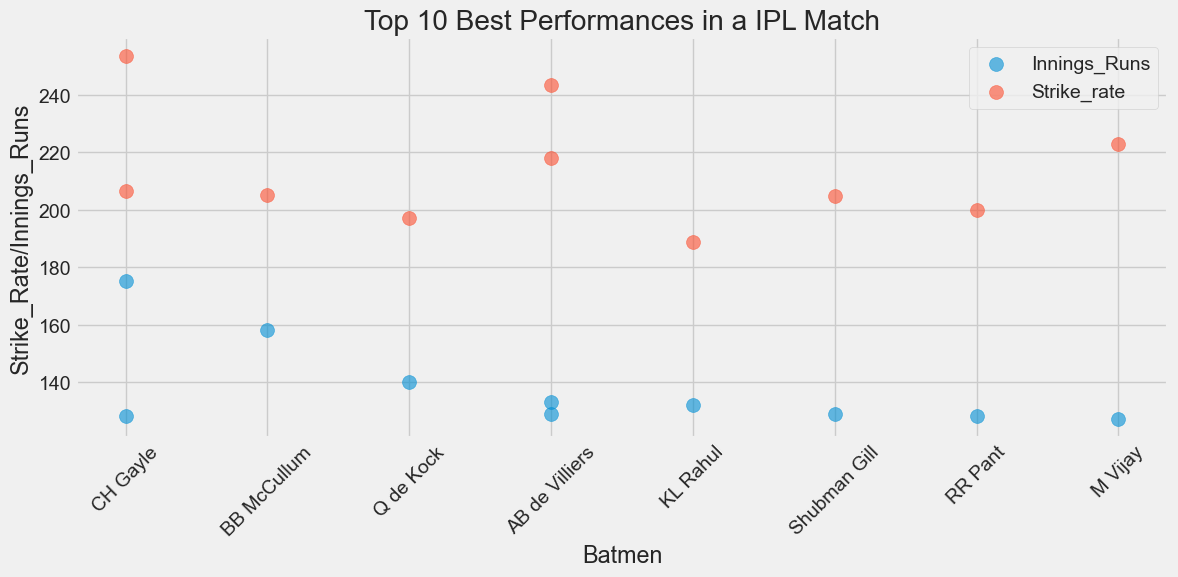

In [77]:
plt.figure(figsize=(12,6))
plt.scatter(batsmen_performance["batter"], batsmen_performance["Innings_Runs"],label="Innings_Runs",s=100,alpha=0.6)
plt.scatter(batsmen_performance["batter"], batsmen_performance["Strike_rate"],label="Strike_rate",s=100,alpha=0.6)
plt.title('Top 10 Best Performances in a IPL Match')
plt.xlabel('Batmen')
plt.ylabel('Strike_Rate/Innings_Runs')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## -- 5. Top 10 Bowlers with Highest wickets in IPL --

In [89]:
bowling_wickets = deliveries[deliveries["dismissal_kind"] != "run out"]
Top_10_Bowlers=bowling_wickets.groupby("bowler")["dismissal_kind"].count().reset_index(name="Wickets").sort_values(by="Wickets",ascending=False)[:10]
Top_10_Bowlers

,bowler,Wickets
524,YS Chahal,205
348,PP Chawla,192
119,DJ Bravo,183
355,R Ashwin,181
71,B Kumar,181
446,SP Narine,180
8,A Mishra,174
438,SL Malinga,170
193,JJ Bumrah,168
373,RA Jadeja,160


In [90]:
# Visualization of the Top 10 Bowlers in IPL

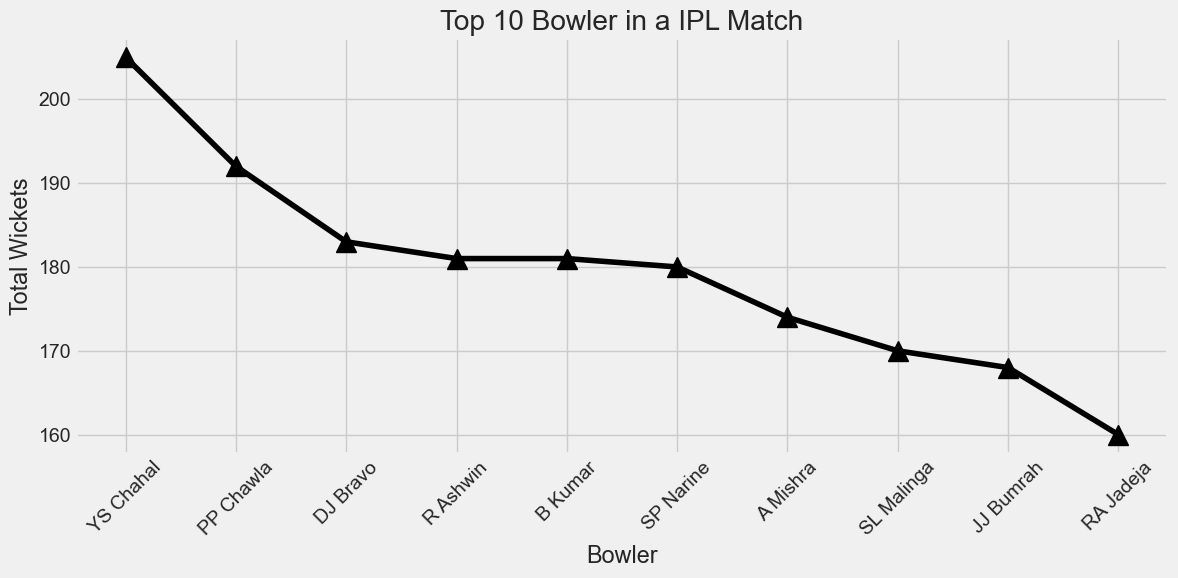

In [99]:
plt.figure(figsize=(12,6))
plt.plot(Top_10_Bowlers["bowler"],Top_10_Bowlers["Wickets"],marker="^",ms="15",color="k")
plt.title('Top 10 Bowler in a IPL Match')
plt.xlabel('Bowler')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## -- 6. Top 10 Bowling performances in all Seasons --

In [104]:
Top_performer = bowling_wickets.groupby(["match_id",'bowler'])["dismissal_kind"].count().reset_index(name="wickets"
                                                                        ).sort_values(by="wickets",ascending=False).head(10)
Top_performer  

,match_id,bowler,wickets
8498,1178394,AS Joseph,6
6608,980979,A Zampa,6
290,336005,Sohail Tanvir,6
10991,1304100,PWH de Silva,5
12085,1370351,Akash Madhwal,5
2757,501251,MM Patel,5
10716,1304076,YS Chahal,5
3208,548323,SP Narine,5
12373,1422139,Yash Thakur,5
11968,1359536,B Kumar,5


In [164]:
Runs_given_by_bowler = deliveries.groupby('bowler')["total_runs"].sum().reset_index(name="Runs conceded")
Runs_given_by_bowler
                                                                        

,bowler,Runs conceded
0,A Ashish Reddy,400
1,A Badoni,37
2,A Chandila,245
3,A Choudhary,144
4,A Dananjaya,47
...,...,...
525,Yash Dayal,933
526,Yash Thakur,702
527,Yudhvir Singh,125
528,Yuvraj Singh,1091


In [167]:
bowler_performance = pd.merge(Top_performer,Runs_given_by_bowler,how="inner",on="bowler")
bowler_performance=bowler_performance.sort_values(by=["wickets","Runs conceded"],ascending=[False,True])
bowler_performance

,match_id,bowler,wickets,Runs conceded
2,336005,Sohail Tanvir,6,275
1,980979,A Zampa,6,562
0,1178394,AS Joseph,6,707
4,1370351,Akash Madhwal,5,431
8,1422139,Yash Thakur,5,702
3,1304100,PWH de Silva,5,758
5,501251,MM Patel,5,1733
7,548323,SP Narine,5,4672
6,1304076,YS Chahal,5,4681
9,1359536,B Kumar,5,5051


In [168]:
total_overs_bowled = deliveries.groupby("bowler")["ball"].count().reset_index(name="Balls Bowled")  # no of bowls bowled
total_overs_bowled["Overs Bowled"] = (total_overs_bowled["Balls Bowled"]//6)
total_overs_bowled = total_overs_bowled.sort_values(by="Overs Bowled",ascending=False)  # no of over bowled
total_overs_bowled                                                                               

,bowler,Balls Bowled,Overs Bowled
355,R Ashwin,4679,779
446,SP Narine,4146,691
71,B Kumar,4060,676
348,PP Chawla,3895,649
373,RA Jadeja,3895,649
...,...,...,...
64,Atharva Taide,1,0
522,YBK Jaiswal,1,0
447,SPD Smith,2,0
114,DA Warner,2,0


In [171]:
total_bowler_performace = pd.merge(bowler_performance,total_overs_bowled,how="inner",on="bowler")
total_bowler_performace 

,match_id,bowler,wickets,Runs conceded,Balls Bowled,Overs Bowled
0,336005,Sohail Tanvir,6,275,265,44
1,980979,A Zampa,6,562,425,70
2,1178394,AS Joseph,6,707,454,75
3,1370351,Akash Madhwal,5,431,279,46
4,1422139,Yash Thakur,5,702,432,72
5,1304100,PWH de Silva,5,758,557,92
6,501251,MM Patel,5,1733,1382,230
7,548323,SP Narine,5,4672,4146,691
8,1304076,YS Chahal,5,4681,3628,604
9,1359536,B Kumar,5,5051,4060,676


In [175]:
total_bowler_performace["Economy"] = round(total_bowler_performace["Runs conceded"]/total_bowler_performace ["Overs Bowled"],2)
total_bowler_performace.drop(columns="Balls Bowled")

,match_id,bowler,wickets,Runs conceded,Overs Bowled,Economy
0,336005,Sohail Tanvir,6,275,44,6.25
1,980979,A Zampa,6,562,70,8.03
2,1178394,AS Joseph,6,707,75,9.43
3,1370351,Akash Madhwal,5,431,46,9.37
4,1422139,Yash Thakur,5,702,72,9.75
5,1304100,PWH de Silva,5,758,92,8.24
6,501251,MM Patel,5,1733,230,7.53
7,548323,SP Narine,5,4672,691,6.76
8,1304076,YS Chahal,5,4681,604,7.75
9,1359536,B Kumar,5,5051,676,7.47


In [178]:
# Visualization of the Top 10 Bowling performances in all Seasons

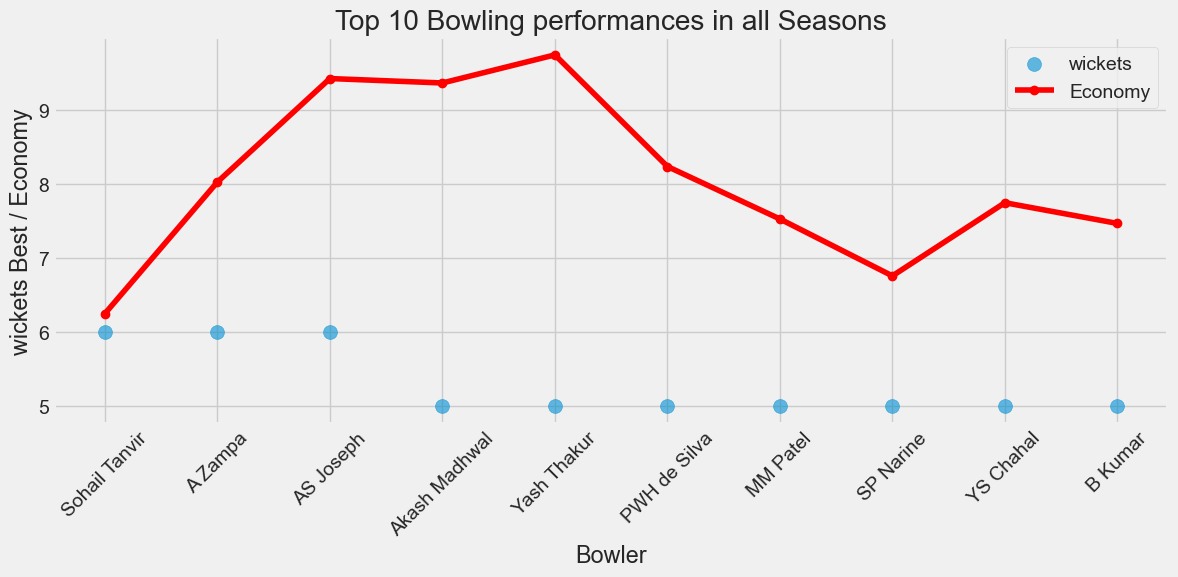

In [180]:
plt.figure(figsize=(12,6))
plt.scatter(total_bowler_performace["bowler"], total_bowler_performace["wickets"],label="wickets",s=100,alpha=0.6)
plt.plot(total_bowler_performace["bowler"], total_bowler_performace["Economy"],marker="o",label="Economy",color="red")
plt.title('Top 10 Bowling performances in all Seasons')
plt.xlabel('Bowler')
plt.ylabel('wickets Best / Economy')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## -- 7. Top 10 Cities By Number of Matches -- 

In [192]:
Top_10_cities = matches["city"].value_counts().reset_index(name="match count").head(10)  # Top 10 cities 
Top_10_cities                                                                               

,city,match count
0,Mumbai,173
1,Kolkata,93
2,Delhi,90
3,Chennai,85
4,Hyderabad,77
5,Bangalore,65
6,Chandigarh,61
7,Jaipur,57
8,Unknown,51
9,Pune,51


In [193]:
# Visualization of the Top 10 Cities By Number of Matches

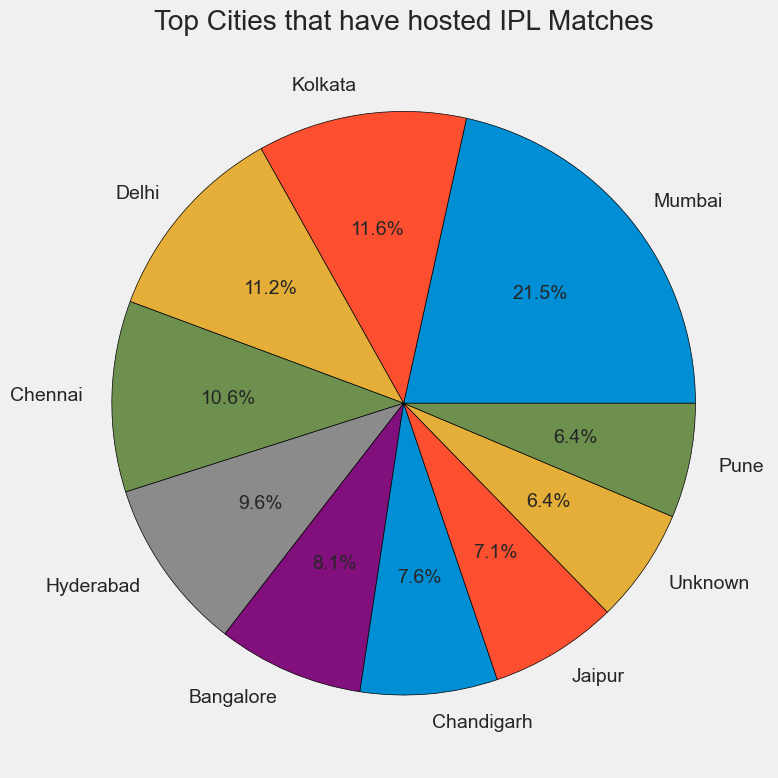

In [197]:
plt.figure(figsize=(8,8))
plt.pie(Top_10_cities['match count'], labels = Top_10_cities['city'],
        autopct='%.1f%%', wedgeprops=dict(edgecolor='black'))
plt.title('Top Cities that have hosted IPL Matches')
plt.tight_layout()
plt.show()

## -- 8. Top Dismissal Kinds --

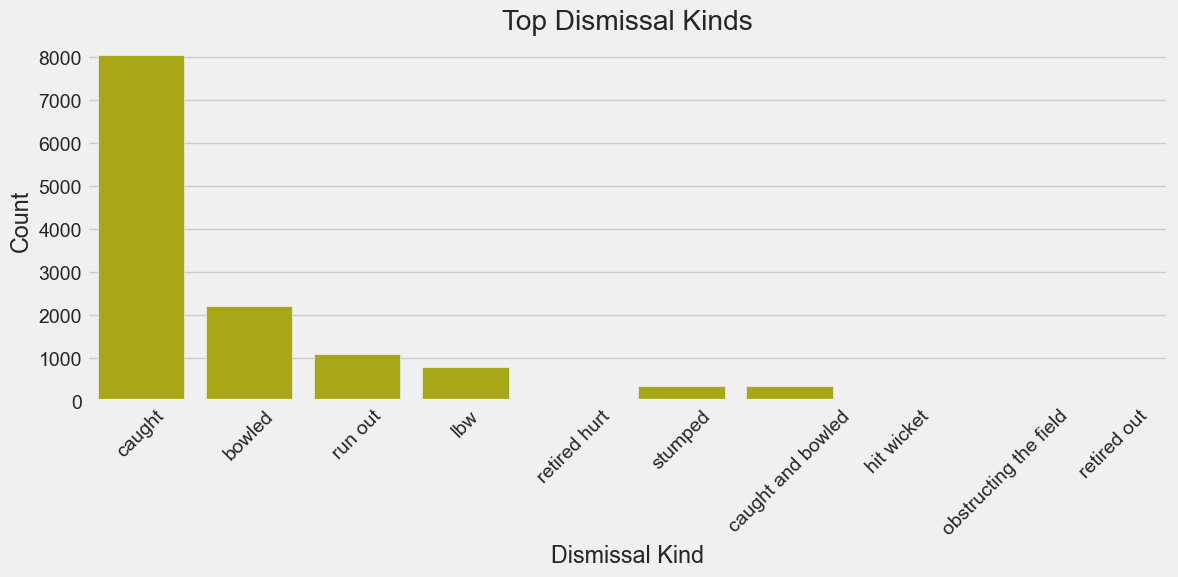

In [224]:
plt.figure(figsize=(12,6))
sns.countplot(x='dismissal_kind', data=deliveries,color="y")
plt.title('Top Dismissal Kinds')
plt.xlabel('Dismissal Kind')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

## -- 9. Top 10 fielders --

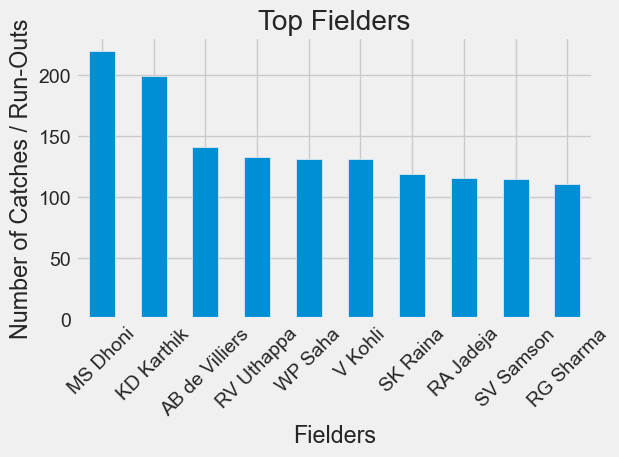

In [228]:
deliveries['fielder'].value_counts()[:10].plot(kind='bar')
plt.title('Top Fielders')
plt.xlabel('Fielders')
plt.ylabel('Number of Catches / Run-Outs')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

## --10. Over by Over Analysis --

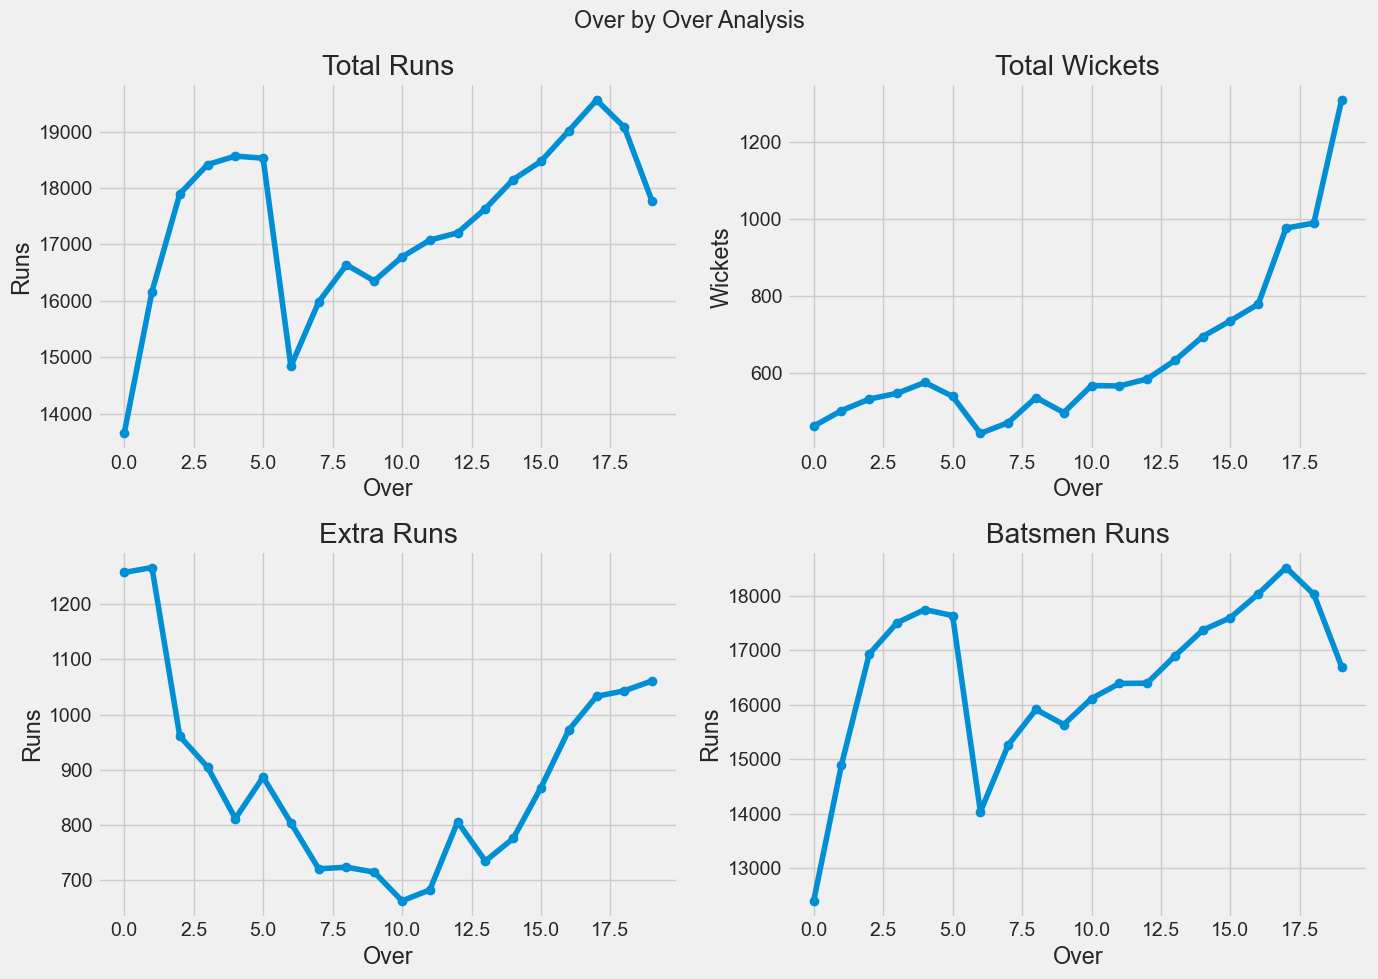

In [232]:
over_summary = deliveries.groupby('over')[['total_runs', 'is_wicket', 'extra_runs', 'batsman_runs']].sum()
fig, axes = plt.subplots(2,2, figsize=(14,10))
fig.suptitle('Over by Over Analysis')

axes[0,0].plot(over_summary.index,over_summary['total_runs'],marker='o')
axes[0,0].set_title('Total Runs')
axes[0,0].set_xlabel('Over')
axes[0,0].set_ylabel('Runs')

axes[0,1].plot(over_summary.index,over_summary['is_wicket'],marker='o')
axes[0,1].set_title('Total Wickets')
axes[0,1].set_xlabel('Over')
axes[0,1].set_ylabel('Wickets')

axes[1,0].plot(over_summary.index,over_summary['extra_runs'],marker='o')
axes[1,0].set_title('Extra Runs')
axes[1,0].set_xlabel('Over')
axes[1,0].set_ylabel('Runs')

axes[1,1].plot(over_summary.index,over_summary['batsman_runs'],marker='o')
axes[1,1].set_title('Batsmen Runs')
axes[1,1].set_xlabel('Over')
axes[1,1].set_ylabel('Runs')

plt.tight_layout()
plt.show()